<a href="https://colab.research.google.com/github/Manvi234/ML-Concepts/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL.Image as Image
import os 
import cv2
import tensorflow_hub as hub

In [7]:
IMAGE_SHAPE =(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5",input_shape=IMAGE_SHAPE+(3,))
])

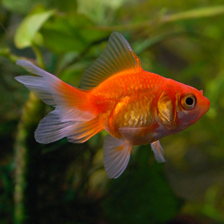

In [30]:
gold_fish = Image.open('goldfish2.png').resize(IMAGE_SHAPE)
gold_fish

In [31]:
gold_fish = np.array(gold_fish)
gold_fish

array([[[ 72,  85,  18],
        [ 80,  95,  23],
        [ 89, 107,  30],
        ...,
        [ 84, 100,   1],
        [ 82,  98,   1],
        [ 79,  94,   0]],

       [[ 73,  85,  21],
        [ 83,  97,  28],
        [ 90, 108,  33],
        ...,
        [ 82,  97,   1],
        [ 80,  95,   1],
        [ 77,  92,   0]],

       [[ 73,  85,  22],
        [ 80,  94,  26],
        [ 88, 106,  33],
        ...,
        [ 81,  96,   1],
        [ 79,  94,   2],
        [ 76,  91,   1]],

       ...,

       [[ 14,  28,   4],
        [ 13,  29,   5],
        [ 13,  31,   6],
        ...,
        [ 40,  56,  10],
        [ 40,  57,   9],
        [ 41,  57,   8]],

       [[ 16,  32,   4],
        [ 15,  34,   5],
        [ 14,  35,   5],
        ...,
        [ 35,  52,  12],
        [ 36,  53,  11],
        [ 36,  53,   9]],

       [[ 17,  37,   3],
        [ 18,  39,   5],
        [ 14,  38,   3],
        ...,
        [ 29,  46,  11],
        [ 30,  47,  10],
        [ 30,  48,   9]]

In [32]:
gold_fish = np.array(gold_fish)/255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [33]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [34]:
result = classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 0s 89ms/step


In [35]:
result

array([[ 0.04925078,  1.5174913 ,  8.090176  , ..., -1.740823  ,
        -0.5656849 , -0.23081784]], dtype=float32)

In [36]:
label_index = np.argmax(result)
label_index

2

In [37]:
data_dir = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')


In [38]:
data_dir

'/root/.keras/datasets/ImageNetLabels.txt'

In [39]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [40]:
image_labels[2]

'goldfish'

In [41]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir ="C:\data-science-practice",untar=True)


228813984/228813984 [==============================] - 2s 0us/step


In [42]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [43]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [44]:
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [45]:
count_img = len(list(data_dir.glob('*/*.jpg')))
count_img

3670

In [47]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/8394286483_69fe04cc7f.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/16666836810_216f50e9c3_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

In [48]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/daisy/3711892138_b8c953fdc1_z.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/8085329197_41d53a21e2_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/3117644024_1cbb59a509_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/13826249325_f61cb15f86_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5632774792_0fa33d17eb_n.jpg')]

In [49]:
dandelion = list(data_dir.glob('dandelion/*'))
dandelion[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/4164845062_1fd9b3f3b4.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/18304194360_2a4a0be631_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/2697283969_c1f9cbb936.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/2753166154_0cb51a127b.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/12094442595_297494dba4_m.jpg')]

In [50]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/tulips/54895006_55b49052dc.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/5433747333_869a2a172d_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/6770436217_281da51e49_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/4604238410_bcec9da4a0_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/8511683706_4173683d45_m.jpg')]

In [51]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/2883115621_4837267ea1_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4933229095_f7e4218b28.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/3001531316_efae24d37d_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/9240129413_f240ce7866_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/1217254584_4b3028b93d.jpg')]

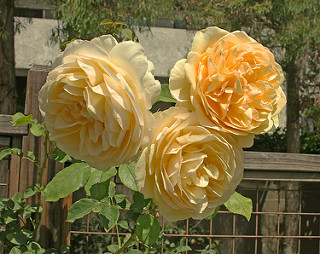

In [52]:
Image.open(str(roses[0]))

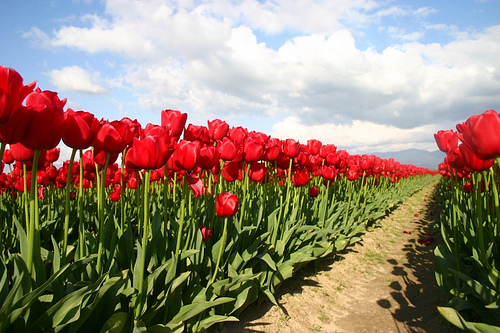

In [53]:
Image.open(str(tulips[0]))

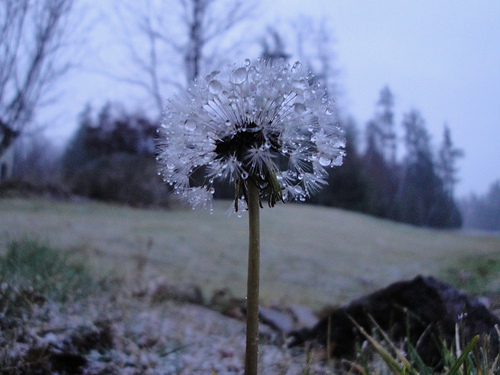

In [55]:
Image.open(str(dandelion[0]))

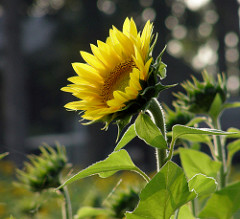

In [56]:
Image.open(str(sunflowers[0]))

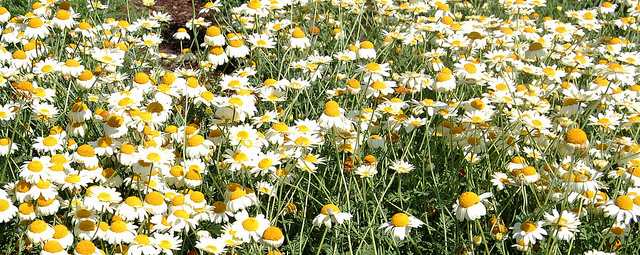

In [57]:
Image.open(str(daisy[0]))

In [58]:
flowers_dict={
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*'))
}

In [59]:
flowers_labels={
    'roses':0,
    'daisy':1,
    'tulips':2,
    'dandelion':3,
    'sunflowers':4
}

In [61]:
img = cv2.imread(str(flowers_dict['roses'][0]))
img.shape

(254, 320, 3)

In [63]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [64]:
X,y = [],[]

for flower_name,images in flowers_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    img_resized = cv2.resize(img,(224,224))
    X.append(img_resized)
    y.append(flowers_labels[flower_name])


In [65]:
X = np.array(X)
y = np.array(y)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [70]:
len(X_train)

2752

In [71]:
len(X_test)

918

In [72]:
X_train_scale = X_train/255
X_test_scale = X_test/255

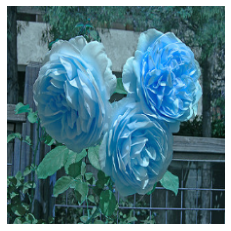

In [73]:
plt.axis("off")
plt.imshow(X[0])

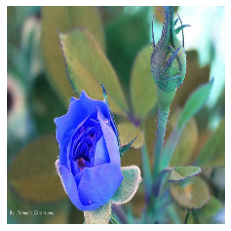

In [74]:
plt.axis("off")
plt.imshow(X[1])

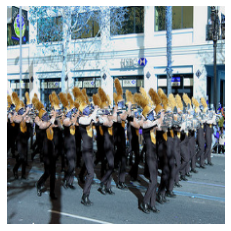

In [75]:
plt.axis("off")
plt.imshow(X[4])

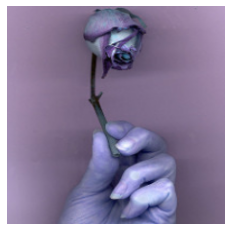

In [76]:
plt.axis("off")
plt.imshow(X[7])

In [86]:
predictions = classifier.predict(np.array([X[0],X[1],X[2]]))
predictions = np.argmax(predictions,axis=1)
predictions

1/1 [==============================] - 0s 158ms/step


array([905, 905, 905])

In [87]:
image_labels[905]


'window screen'

In [90]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/5"


In [91]:
pretrained_model_without_last_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [93]:
number_of_flowers = 5
model = keras.Sequential([
    pretrained_model_without_last_layer,
    layers.Dense(number_of_flowers)

])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1792)              4363712   
                                                                 
 dense_1 (Dense)             (None, 5)                 8965      
                                                                 
Total params: 4,372,677
Trainable params: 8,965
Non-trainable params: 4,363,712
_________________________________________________________________


In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scale, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 194s 2s/step - loss: 0.6558 - accuracy: 0.7525
Epoch 2/5
86/86 [==============================] - 171s 2s/step - loss: 0.3066 - accuracy: 0.8972
Epoch 3/5
86/86 [==============================] - 173s 2s/step - loss: 0.2303 - accuracy: 0.9277
Epoch 4/5
86/86 [==============================] - 166s 2s/step - loss: 0.1846 - accuracy: 0.9444
Epoch 5/5
86/86 [==============================] - 163s 2s/step - loss: 0.1501 - accuracy: 0.9615


In [96]:
model.evaluate(X_test_scale,y_test)

29/29 [==============================] - 54s 2s/step - loss: 0.2817 - accuracy: 0.9020


[0.2816769480705261, 0.9019607901573181]